# Training Model Bi-LSTM Dataset Pidana 200

## Import Requirement

In [26]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
print(tf.__version__)

2.13.0


## Set Parameter Training Model

In [28]:
BATCH_SIZE = 64  # Number of examples used in each iteration
EPOCHS = 100  # Number of passes through entire dataset
MAX_LEN = 10  # Max length of review (in words)
EMBEDDING = 100  # Dimension of word embedding vector

## Import Dataset Pidana 200

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

data = pd.read_csv("LEGALNER-POS-PREV-NEXT-200.csv", encoding="latin1")
# data = pd.read_csv("/kaggle/input/dataset-pidana-baru/Dataset-Pidana200 (1).csv")

data['word'] = data['word'].str.lower()
data['word'] = data['word'].replace(to_replace ='\d+', value = '<\g<0>>', regex = True).replace(to_replace ='[0-9]', value = 'X', regex = True)
data = data.fillna(method="ffill")

C:\Users\grubg\AppData\Local\Temp\ipykernel_2940\3762241819.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("LEGALNER-POS-PREV-NEXT-200.csv", encoding="latin1")
C:\Users\grubg\AppData\Local\Temp\ipykernel_2940\3762241819.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


In [30]:
data

,doc,sentence,word,pos,prev,next,tag
0,doc: 13a5421c5a5de3dc125a2fd01278a5bb,sentence: 0000001,putusan,PROPN,.,.,O
1,doc: 13a5421c5a5de3dc125a2fd01278a5bb,sentence: 0000001,.,PUNCT,PUTUSAN,NOMOR,O
2,doc: 13a5421c5a5de3dc125a2fd01278a5bb,sentence: 0000001,nomor,PROPN,.,:,O
3,doc: 13a5421c5a5de3dc125a2fd01278a5bb,sentence: 0000001,:,PUNCT,NOMOR,1974,O
4,doc: 13a5421c5a5de3dc125a2fd01278a5bb,sentence: 0000001,<XXXX>,NUM,:,/,B_VERN
...,...,...,...,...,...,...,...
1048570,doc: 435b8e7537ce615374b4bf7d17e88e1b,sentence: 0039957,bahwa,SCONJ,-,mekanisme,O
1048571,doc: 435b8e7537ce615374b4bf7d17e88e1b,sentence: 0039957,mekanisme,NOUN,Bahwa,perpanjangan,O
1048572,doc: 435b8e7537ce615374b4bf7d17e88e1b,sentence: 0039957,perpanjangan,NOUN,mekanisme,dan,O
1048573,doc: 435b8e7537ce615374b4bf7d17e88e1b,sentence: 0039957,dan,CCONJ,perpanjangan,penambahan,O


In [31]:
data.groupby('tag').count()

,doc,sentence,word,pos,prev,next
tag,,,,,,
B_ADVO,322,322,322,322,322,322
B_ARTV,1912,1912,1912,1912,1912,1912
B_CRIA,102,102,102,102,102,102
B_DEFN,13034,13034,13034,13034,13034,13034
B_JUDG,315,315,315,315,315,315
B_JUDP,127,127,127,127,127,127
B_PENA,106,106,106,106,106,106
B_PROS,116,116,116,116,116,116
B_PUNI,178,178,178,178,178,178


In [32]:
data = data[data['pos'] != 'PUNCT']
data = data[data['pos'] != 'PRON']
data = data[data['pos'] != 'CCONJ']
data = data[data['pos'] != 'ADP']
data = data[data['pos'] != 'AUX']
data = data[data['pos'] != 'DET']
data = data[data['pos'] != 'ADV> Menimbang <VERB']
data = data[data['pos'] != ' <SYM']
data = data[data['pos'] != 'PROPN> LEL <PROPN']
data = data[data['pos'] != 'PROPN> _ <PROPN> Er <PROPN']
data = data[data['pos'] != 'PROPN> _ <PUNCT> IV <NUM']
data = data[data['pos'] != 'PROPN> _ <PROPN> Ep <PROPN']

In [33]:
# data[data['pos'] == 'PRON']

In [34]:
# data['pos'].unique()

In [35]:
# data['tag'] = data['tag'].apply(lambda x: [x])
# # Gabungkan tags dalam sentence yang sama dan hapus sentence yang hanya berisi tag 'O'
# df_combined = (
#     data.groupby(['doc', 'sentence'])['tag']
#     .agg(lambda x: sum(x, []))
#     .apply(lambda tags: tags if any(tag != 'O' for tag in tags) else [])
#     .reset_index(name='tag')
# )

# # Hapus baris yang tidak memiliki tag atau memiliki tag kosong
# df_combined = df_combined[df_combined['tag'].apply(lambda x: bool(x))]

# # Buat DataFrame baru hanya berisi baris yang sesuai dengan df_combined
# filtered_df = data[data['sentence'].isin(df_combined['sentence'])]

# # Pisahkan df_combined per tag dan isi sentence berdasarkan tag yang dipisah tadi
# result_rows = []
# for index, row in filtered_df.iterrows():
#     for tag in row['tag']:
#         result_rows.append({
#             'doc': row['doc'],
#             'sentence': row['sentence'],
#             'word': row['word'],
# #             'pos': row['pos'],
#             'prev': row['prev'],
#             'next': row['next'],
#             'tag': tag
#         })

# # Tampilkan dataframe setelah penggabungan, penghapusan, pemisahan kembali tags, dan pengisian kolom 'sentence'
# data = pd.DataFrame(result_rows)

# # Tampilkan dataframe hasil
# data

In [36]:
data.groupby('tag').count()

,doc,sentence,word,pos,prev,next
tag,,,,,,
B_ADVO,300,300,300,300,300,300
B_ARTV,1859,1859,1859,1859,1859,1859
B_CRIA,87,87,87,87,87,87
B_DEFN,10608,10608,10608,10608,10608,10608
B_JUDG,243,243,243,243,243,243
B_JUDP,83,83,83,83,83,83
B_PENA,106,106,106,106,106,106
B_PROS,101,101,101,101,101,101
B_PUNI,177,177,177,177,177,177


## Menambahkan token untuk Padding data

In [37]:
words = list(set(data["word"].values))
words.append("ENDPAD")
n_words = len(words)
n_words

13408

In [38]:
tags = list(set(data["tag"].values))
n_tags = len(tags)
n_tags

25

## Mengambil Data berdasarkan Dokumen dan Sentence

In [39]:
class SentenceGetter(object):

    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
                                                           s["tag"].values.tolist())]
        self.grouped = self.data.groupby("sentence").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped[self.n_sent]
            self.n_sent += 1
            return s
        except:
            return None

class DocGetter(object):

    def __init__(self, data):
        self.n_doc = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
                                                           s["tag"].values.tolist())]
        self.grouped = self.data.groupby("doc").apply(agg_func)
        self.docs = [s for s in self.grouped]

    def get_next(self):
        try:
            d = self.grouped[self.n_doc]
            self.n_doc += 1
            return d
        except:
            return None

In [40]:
# getter = DocGetter(data)
# docs = getter.docs
getter = SentenceGetter(data)
sentences = getter.sentences

C:\Users\grubg\AppData\Local\Temp\ipykernel_2940\1849700858.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  self.grouped = self.data.groupby("sentence").apply(agg_func)


### Visualisasi panjang kalimat pada dataset berdasarkan sentence

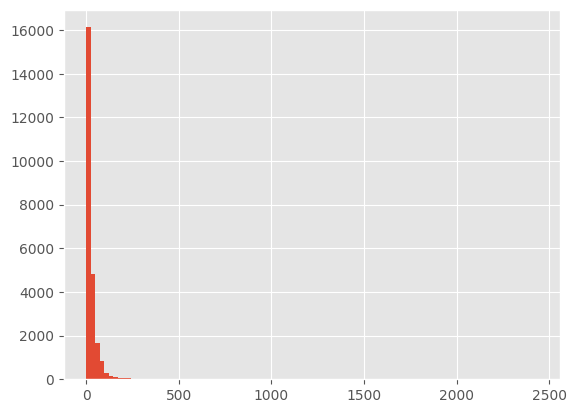

In [41]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

plt.hist([len(s) for s in sentences], bins=100)
plt.show()

## Membentuk Dictionary

In [42]:
# Vocabulary Key:word -> Value:token_index
# The first 2 entries are reserved for PAD and UNK
# word2idx = {w: i + 2 for i, w in enumerate(vocab)}
word2idx = {k: v + 2 for (k, v) in zip(words, range(len(words)))}
word2idx["UNK"] = 1 # Unknown words
word2idx["PAD"] = 0 # Padding

# Vocabulary Key:token_index -> Value:word
idx2word = {i: w for w, i in word2idx.items()}

# Vocabulary Key:Label/Tag -> Value:tag_index
# The first entry is reserved for PAD
tag2idx = {t: i+1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0

# Vocabulary Key:tag_index -> Value:Label/Tag
idx2tag = {i: w for w, i in tag2idx.items()}

## Spliting Dataset Training dan Testing

In [43]:
from tensorflow.keras.utils import pad_sequences

# Convert each sentence from list of Token to list of word_index
X = [[word2idx[w[0]] for w in s] for s in sentences]
# Padding each sentence to have the same lenght
X = pad_sequences(maxlen=MAX_LEN, sequences=X, padding="post", value=word2idx["PAD"])


# Convert Tag/Label to tag_index
y = [[tag2idx[w[1]] for w in s] for s in sentences]
# Padding each sentence to have the same lenght
y = pad_sequences(maxlen=MAX_LEN, sequences=y, padding="post", value=tag2idx["PAD"])

from keras.utils import to_categorical
# One-Hot encode
y = [to_categorical(i, num_classes=n_tags+1) for i in y]

from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, shuffle=False)
X_tr.shape, X_te.shape, np.array(y_tr).shape, np.array(y_te).shape

((21909, 10), (2435, 10), (21909, 10, 26), (2435, 10, 26))

## Cek konversi dataset ke bentuk indeks

In [44]:
print("The word indonesia is identified by the index: {}".format(word2idx["indonesia"]))
print("The labels B_ADVO is identified by the index: {}".format(tag2idx["B_ADVO"]))
i=2
print('Raw Sample  : ', ' '.join([w for w, t in getter.sentences[i]]))
print('Text2vec    : ', ' '.join(['{}'.format(word2idx[w]) for w, t in getter.sentences[i]]))
print('Text2vec PAD: ', ' '.join(['{}'.format(w) for w in X[i]]))
print('Raw Label   : ', ' '.join([t for w, t in getter.sentences[i]]))
print('Tag2vec     : ', ' '.join(['{}'.format(tag2idx[t]) for w, t in getter.sentences[i]]))

The word indonesia is identified by the index: 10357
The labels B_ADVO is identified by the index: 5
Raw Sample  :  agnes tri ahadi als anas lahir jakarta umur tanggal <XX> tahun <X> agustus <XXXX> jenis kelamin laki laki kebangsaan indonesia tempat tinggal jl kamp bali gg ii no <X> kel kampung bali kec tanah abang jakarta pusat terdakwa ditahan sejak tanggal <XX> juli <XXXX> sampai sekarang
Text2vec    :  10629 10058 2581 7816 5452 10117 11446 522 8127 1715 11487 744 12070 12283 13037 13402 4101 4101 2045 10357 10848 9651 8894 9432 2355 3680 8758 9883 744 8933 5799 2355 11558 11468 5466 11446 11378 10806 10061 13319 8127 1715 11162 12283 13276 5791
Text2vec PAD:  11378 10806 10061 13319 8127 1715 11162 12283 13276 5791
Raw Label   :  B_DEFN I_DEFN I_DEFN I_DEFN I_DEFN O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
Tag2vec     :  8 4 4 4 4 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12

In [45]:
! pip install tensorflow-addons

## Arsitektur Model

In [46]:
from keras import Model
from keras import optimizers
from keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, SpatialDropout1D
from tensorflow_addons.layers import CRF

input = Input(shape=(MAX_LEN,))

model = Embedding(input_dim=n_words+1, output_dim=EMBEDDING, input_length=MAX_LEN)(input)
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)

out = TimeDistributed(Dense(n_tags+1, activation="softmax"))(model)  # softmax output layer

model = Model(input, out)

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

d:\Matkul\Tugas_Matkul\Semester5\IE\Tugas5\.venv\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding (Embedding)       (None, 10, 100)           1340900   
                                                                 
 dropout (Dropout)           (None, 10, 100)           0         
                                                                 
 bidirectional (Bidirection  (None, 10, 200)           160800    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 10, 26)            5226      
 ributed)                                                        
                                                                 
Total params: 1506926 (5.75 MB)
Trainable params: 1506926 (5.

In [47]:
history = model.fit(np.array(X_tr).astype(int),
                    np.array(y_tr).astype(int),
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/100
309/309 [==============================] - 9s 19ms/step - loss: 0.4161 - accuracy: 0.9240 - val_loss: 0.2387 - val_accuracy: 0.9464
Epoch 2/100
309/309 [==============================] - 6s 18ms/step - loss: 0.1216 - accuracy: 0.9672 - val_loss: 0.1795 - val_accuracy: 0.9511
Epoch 3/100
309/309 [==============================] - 5s 17ms/step - loss: 0.0796 - accuracy: 0.9782 - val_loss: 0.1729 - val_accuracy: 0.9529
Epoch 4/100
309/309 [==============================] - 5s 17ms/step - loss: 0.0614 - accuracy: 0.9830 - val_loss: 0.2103 - val_accuracy: 0.9511
Epoch 5/100
309/309 [==============================] - 5s 17ms/step - loss: 0.0517 - accuracy: 0.9855 - val_loss: 0.1843 - val_accuracy: 0.9538
Epoch 6/100
309/309 [==============================] - 5s 18ms/step - loss: 0.0445 - accuracy: 0.9876 - val_loss: 0.1865 - val_accuracy: 0.9539
Epoch 7/100
309/309 [==============================] - 6s 18ms/step - loss: 0.0396 - accuracy: 0.9889 - val_loss: 0.1686 - val_accuracy:

### Save Model

In [48]:
import torch

In [ ]:
path = 'model-BiLSTM-Pidana200'
model.save(model, path)

### Visualisasi hasil training model

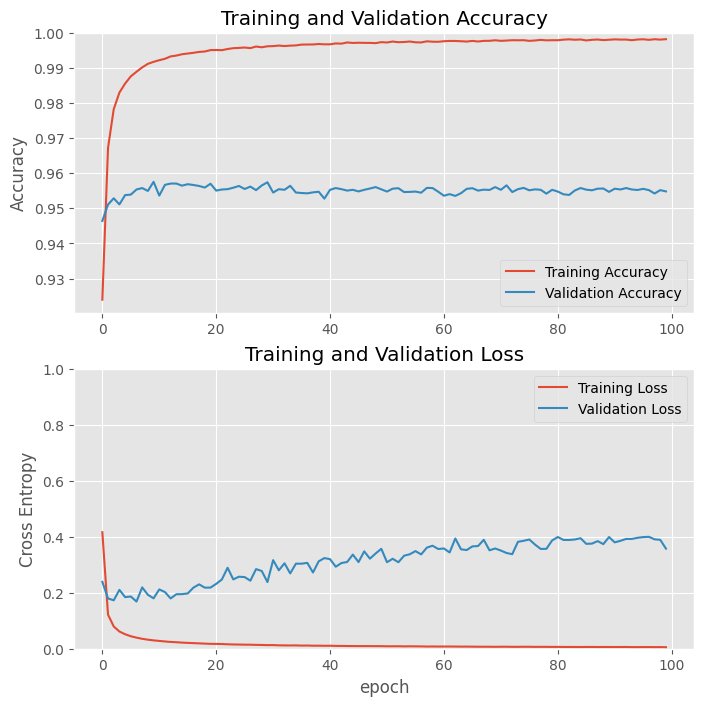

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Evaluasi

In [51]:
print("Max index in X_te:", X_te.max())
print("n_words:", n_words)

Max index in X_te: 13402
n_words: 13408


In [52]:
eve = model.predict(X_te)

77/77 [==============================] - 1s 3ms/step


In [53]:
y_pred = np.argmax(eve, axis=-1)
y_test_true = np.argmax(y_te, -1)

# Convert the index to tag
y_pred = [[idx2tag[i] for i in row] for row in y_pred]
y_test_true = [[idx2tag[i] for i in row] for row in y_test_true]

In [54]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

m = MultiLabelBinarizer().fit(y_test_true)
print("Precision Score: {}".format(precision_score(m.transform(y_test_true), m.transform(y_pred), average="macro")))
print("Recall Score   : {}".format(recall_score(m.transform(y_test_true), m.transform(y_pred), average="macro")))
print("F1-score Score : {}".format(f1_score(m.transform(y_test_true), m.transform(y_pred), average="macro")))

Precision Score: 0.6592955864464377
Recall Score   : 0.6476561107419717
F1-score Score : 0.6190473700299834


d:\Matkul\Tugas_Matkul\Semester5\IE\Tugas5\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['I_CRIA'] will be ignored
  warnings.warn(
d:\Matkul\Tugas_Matkul\Semester5\IE\Tugas5\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Matkul\Tugas_Matkul\Semester5\IE\Tugas5\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['I_CRIA'] will be ignored
  warnings.warn(
d:\Matkul\Tugas_Matkul\Semester5\IE\Tugas5\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['I_CRIA'] will be ignored
  warnings.warn(


In [55]:
from sklearn.metrics import classification_report
def c_report(y_pred, y_true):
  # Menggabungkan elemen-elemen array menjadi satu list
  y_pred_flat = [item for sublist in y_pred for item in sublist]
  y_true_flat = [item for sublist in y_true for item in sublist]
  report = classification_report(y_pred_flat, y_true_flat)
  return report

In [56]:
report = c_report(y_pred, y_test_true)
print(report)

d:\Matkul\Tugas_Matkul\Semester5\IE\Tugas5\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Matkul\Tugas_Matkul\Semester5\IE\Tugas5\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      B_ADVO       0.00      0.00      0.00         1
      B_ARTV       0.78      0.92      0.85        66
      B_DEFN       0.19      0.50      0.28       114
      B_JUDG       0.00      0.00      0.00         0
      B_PENA       0.50      1.00      0.67         2
      B_PROS       1.00      0.33      0.50         3
      B_PUNI       0.82      0.75      0.78        12
      B_REGI       0.33      1.00      0.50         1
      B_VERN       1.00      0.78      0.88         9
      I_ADVO       0.00      0.00      0.00         8
      I_ARTV       0.88      0.89      0.89       406
      I_CRIA       0.00      0.00      0.00         3
      I_DEFN       0.46      0.75      0.57       366
      I_JUDG       0.59      0.90      0.72        21
      I_PENA       0.56      0.50      0.53        10
      I_PROS       0.62      0.56      0.59         9
      I_PUNI       0.75      0.68      0.71        22
      I_REGI       0.60    

d:\Matkul\Tugas_Matkul\Semester5\IE\Tugas5\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Matkul\Tugas_Matkul\Semester5\IE\Tugas5\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Matkul\Tugas_Matkul\Semester5\IE\Tugas5\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

### Confusion matriks

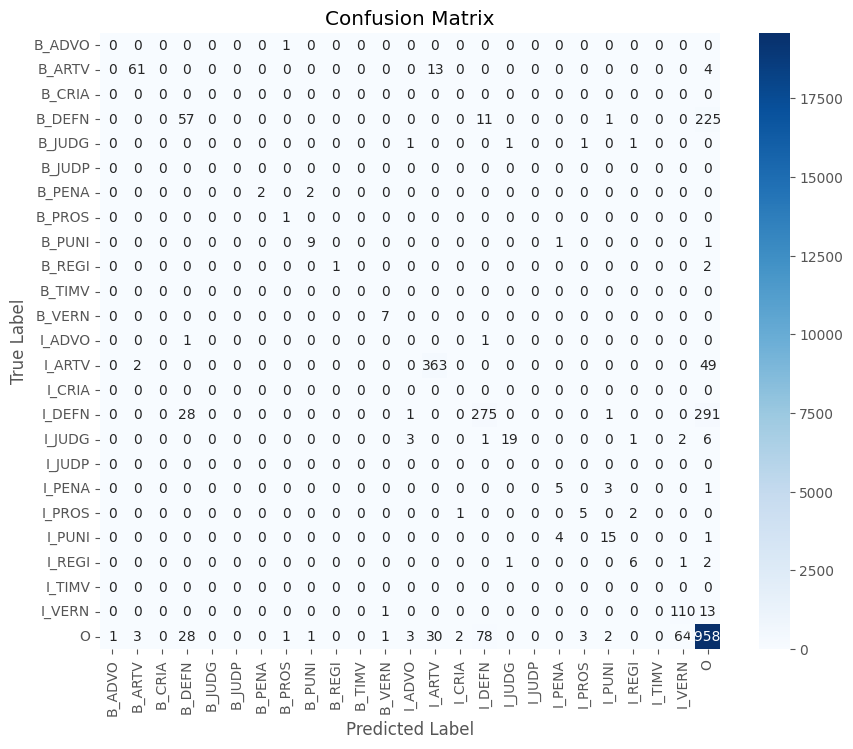

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Definisi class_names (sesuaikan dengan label yang sesuai dalam datasetmu)
class_names = ['B_ADVO', 'B_ARTV', 'B_CRIA', 'B_DEFN', 'B_JUDG', 'B_JUDP', 'B_PENA', 'B_PROS', 'B_PUNI', 'B_REGI', 'B_TIMV', 'B_VERN', 'I_ADVO', 'I_ARTV', 'I_CRIA', 'I_DEFN', 'I_JUDG', 'I_JUDP', 'I_PENA', 'I_PROS', 'I_PUNI', 'I_REGI', 'I_TIMV', 'I_VERN', 'O']

conf_mat = confusion_matrix([item for sublist in y_test_true for item in sublist],
                            [item for sublist in y_pred for item in sublist],
                            labels=class_names)
# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt=".0f", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [58]:
%pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [59]:
# Function to clean the page
def clean_page(text):
    text = text.replace("Mahkamah Agung Republik Indonesia\nMahkamah Agung Republik Indonesia\nMahkamah Agung Republik Indonesia\nMahkamah Agung Republik Indonesia\nMahkamah Agung Republik Indonesia\nDirektori Putusan Mahkamah Agung Republik Indonesia\nputusan.mahkamahagung.go.id\n", "")
    text = text.replace("\nDisclaimer\nKepaniteraan Mahkamah Agung Republik Indonesia berusaha untuk selalu mencantumkan informasi paling kini dan akurat sebagai bentuk komitmen Mahkamah Agung untuk pelayanan publik, transparansi dan akuntabilitas\npelaksanaan fungsi peradilan. Namun dalam hal-hal tertentu masih dimungkinkan terjadi permasalahan teknis terkait dengan akurasi dan keterkinian informasi yang kami sajikan, hal mana akan terus kami perbaiki dari waktu kewaktu.\nDalam hal Anda menemukan inakurasi informasi yang termuat pada situs ini atau informasi yang seharusnya ada, namun belum tersedia, maka harap segera hubungi Kepaniteraan Mahkamah Agung RI melalui :\nEmail : kepaniteraan@mahkamahagung.go.id", "")
    text = text.replace("Telp : 021-384 3348 (ext.318)", "")
    text = re.sub(r'\nHalaman \d+ dari \d+ .*', '', text)
    text = re.sub(r'Halaman \d+ dari \d+ .*', '', text)
    text = re.sub(r'\nHal. \d+ dari \d+ .*', '', text)
    text = re.sub(r'Hal. \d+ dari \d+ .*', '', text)
    return text.strip()


def fix_word(text, word):
    words = []
    for i in range(1, len(word)):
        word_pattern = " ".join([word[:i], word[i:len(word)]])
        words.append(word_pattern)
    
    for w in words:
        text = text.replace(w, word)

    text = text.replace(" ".join([char for char in word]), word)
    return text



# Function to clean the text
def clean_text(text):
    text = text.replace('P U T U S A N', 'PUTUSAN').replace('T erdakwa', 'Terdakwa').replace('T empat', 'Tempat').replace('T ahun', 'Tahun')
    text = text.replace('P  E  N  E  T  A  P  A  N', 'PENETAPAN').replace('J u m l a h', 'Jumlah').replace('M E N G A D I L I', 'MENGADILI')
    text = re.sub(r'Halaman \d+', ' ', text)
    text = text.replace('\uf0d8', '').replace('\uf0b7', '').replace('\n', ' ')
    text = fix_word(text, "penuntut")
    text = fix_word(text, "Penuntut")
    text = fix_word(text, "bulan")
    text = fix_word(text, "tahun")
    text = fix_word(text, "sejumlah")
    text = fix_word(text, "waktu")
    text = fix_word(text, "Panitera")
    text = fix_word(text, "dihadiri")
    text = fix_word(text, "oleh")
    text = fix_word(text, "panitera")
    text = fix_word(text, "MENGADILI")
    text = fix_word(text, "Penasihat")
    text = fix_word(text, "penasihat")
    text = fix_word(text, "hakim")
    text = fix_word(text, "Hakim")
    text = fix_word(text, "dikurangi")
    text = fix_word(text, "Nama")
    text = fix_word(text, "Lengkap")
    text = fix_word(text, "lengkap")
    text = fix_word(text, "nama")
    text = fix_word(text, "Pencurian")
    text = fix_word(text, "pencurian")
    text = fix_word(text, "Pemerasan")
    text = fix_word(text, "pemerasan")
    text = fix_word(text, "Penadahan")
    text = fix_word(text, "sebagaimana")
    text = fix_word(text, "pada")
    text = fix_word(text, "masing-masing")
    text = fix_word(text, "KUHP")
    text = fix_word(text, "penadahan")
    text = re.sub(r'([“”"])', r' \1 ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [60]:
import PyPDF2

def extract_text_pdf(path_pdf): 
    pdf = PyPDF2.PdfReader(path_pdf)
    text = ""
    for page in pdf.pages:
        text += clean_page(page.extract_text())
    
    # with open(text_pdf_folder + pdf_name.strip(".pdf") + ".txt", "w", encoding="utf-8") as text_pdf:
    #     # text_pdf.write(text)

    return clean_text(text)
    print("Extract text selesai")

# extract_text_pdf(list_pdf, pdf_folder, text_pdf_folder)

text = extract_text_pdf("./test.pdf")

d:\Matkul\Tugas_Matkul\Semester5\IE\Tugas5\.venv\Lib\site-packages\PyPDF2\_cmap.py:142: PdfReadWarning: Advanced encoding /SymbolSetEncoding not implemented yet
  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import pad_sequences
import numpy as np
import re

# --- FUNGSI PREPROCESSING & PREDIKSI (dari atas) ---
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', r'<\g<0>>', text)
    text = re.sub(r'[0-9]', 'X', text)
    return text

def prepare_input_sentence_indices(sentence, word2idx, max_len):
    cleaned_sentence = preprocess_text(sentence)
    words = cleaned_sentence.split()
    indices = [word2idx.get(word, word2idx["UNK"]) for word in words]
    padded_indices = pad_sequences(maxlen=max_len, sequences=[indices], padding="post", value=word2idx["PAD"])
    return padded_indices, len(words)

# --- MUAT MODEL & OBJEK PENDUKUNG (sesuaikan path & mapping) ---
try:
    # model_path = 'model-BiLSTM-Pidana200.h5' # Jika H5
    model_path = 'model-BiLSTM-Pidana200' # Jika folder SavedModel
    loaded_model = tf.keras.models.load_model(model_path)
except Exception as e:
    print(f"Error saat memuat model Keras: {e}")
    print("Pastikan model disimpan menggunakan model.save() dan path sudah benar.")
    exit()
tag2idx = {t: i+1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: w for w, i in tag2idx.items()}
n_tags = len(tags)
n_words = len(word2idx)
MAX_LEN = 10 # Harus 10 sesuai training

# --- PROSES PREDIKSI ---
new_sentence = text# Contoh

input_data_indices, original_length = prepare_input_sentence_indices(new_sentence, word2idx, MAX_LEN)
predictions_prob = loaded_model.predict(input_data_indices)
predicted_indices = np.argmax(predictions_prob, axis=-1)[0]
predicted_tags = [idx2tag.get(idx, 'PAD') for idx in predicted_indices]

effective_length = min(original_length, MAX_LEN)
final_tags = predicted_tags[:effective_length]

# --- TAMPILKAN HASIL ---
cleaned_sentence_for_display = preprocess_text(new_sentence)
words_for_display = cleaned_sentence_for_display.split()[:effective_length]

print("Kalimat Input:", new_sentence)
print(f"(Prediksi dibatasi {MAX_LEN} token pertama)")
print("-" * 30)
print("Kata\t\tPrediksi Tag")
print("-" * 30)
for word, tag in zip(words_for_display, final_tags):
    print(f"{word:<15}\t{tag}")

1/1 [==============================] - 0s 367ms/step
Kalimat Input: dari 15Putusan Nomor 115/Pid.B/ 2022/PN PklPUTUSAN Nomor 115/Pid.B/ 2022/PNPkl DEMI KEADILAN BERDASARKAN KETUHANAN YANG MAHA ESA Pengadilan Negeri Pekalongan yang mengadili perkara pidana dengan acara pemeriksaan biasa dalam ting kat pertama menjatuhkan putusan sebagai berikut dalam perkara Terdakwa : Nama lengkap :Hendri Suhendro als Gus Konslet Bin (Alm) Hartono; Tempat lahir :Pekalongan; Umur/tanggal lahir :33Tahun / 17 April 1988; Jenis Kelamin :Laki-laki; Kebangsaan :Indonesia; Tempat tinggal :Boyongsari Rt.05/Rw.07 Kel. Panjang Baru Kec. Pekalongan Utara Kota Pekalongan; Agama :Islam; Pekerjaan :Buruh ; Terdakwa ditangkap pada tanggal 8 April 2022 ; Terdakwa d itahan dalam Tahanan Rutan oleh: 1.Penyidik sejak tanggal 09 April 2022 sampai dengan tanggal 28 April 2022; 2.Penyidik Perpanjangan oleh Penuntut Umum sejak tanggal 29 April 2022 sampai dengan tanggal 07 Juni 2022; 3.Penuntut Umum sejak tanggal 06 Juni 202